# Median

In [ ]:
//Brute Force
class MedianFinder {
    vector<int> v;
public:
    MedianFinder() {
        
    }
    
    void addNum(int num) {
        v.push_back(num);
    }
    
    double findMedian() {
        sort(v.begin(),v.end());
        int n=v.size();
        return n&1?v[n/2]:(v[n/2]+v[n/2-1])*0.5;
    }
};

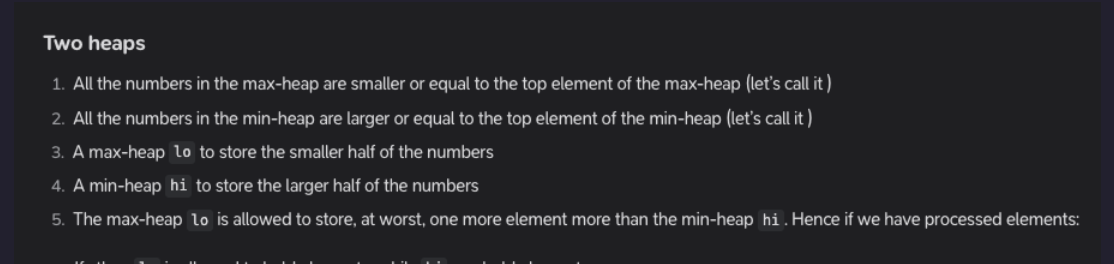

This gives us the nice property that when the heaps are perfectly balanced, the median can be derived from the tops of both heaps. Otherwise, the top of the max-heap lo holds the legitimate median

In [ ]:
class MedianFinder {
    priority_queue<int> maxh;
    priority_queue<int,vector<int>,greater<int>> minh;
public:
    MedianFinder() {
    }
    //maxh minh
    void addNum(int x) {
        //steps to always maintain an order
        maxh.push(x);
        minh.push(maxh.top());
        maxh.pop();

        //maintain size
        if(maxh.size()<minh.size()){
            maxh.push(minh.top());
            minh.pop();
        }
    }
    
    double findMedian() {
        return maxh.size()>minh.size()?maxh.top():(maxh.top()+minh.top())*0.5;
    }
};

/**
 * Your MedianFinder object will be instantiated and called as such:
 * MedianFinder* obj = new MedianFinder();
 * obj->addNum(num);
 * double param_2 = obj->findMedian();
 */

In [ ]:
//multiset
class MedianFinder {
    multiset<int,greater<int>> decreasingSet;
    multiset<int> increasingSet;
public:
    MedianFinder() {
    }
    //decresingSet increasingSet
    void addNum(int x) {
        //steps to always maintain an order
        decreasingSet.insert(x);
        increasingSet.insert(*decreasingSet.begin());
        decreasingSet.erase(decreasingSet.begin());

        //maintain size
        if(decreasingSet.size()<increasingSet.size()){
            decreasingSet.insert(*increasingSet.begin());
            increasingSet.erase(increasingSet.begin());
        }
    }
    
    double findMedian() {
        return decreasingSet.size()>increasingSet.size()?*decreasingSet.begin():(*decreasingSet.begin()+*increasingSet.begin())*0.5;
    }
};

/**
 * Your MedianFinder object will be instantiated and called as such:
 * MedianFinder* obj = new MedianFinder();
 * obj->addNum(num);
 * double param_2 = obj->findMedian();
 */

In [ ]:
//pbds
#include<ext/pb_ds/assoc_container.hpp>
#include<ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;
typedef tree<long long, null_type, less_equal<long long>, rb_tree_tag, tree_order_statistics_node_update> pbds; // find_by_order, order_of_key
class MedianFinder {
private:
     pbds A;
public:
    MedianFinder() {
    }
    
    void addNum(int num) {
        A.insert(num);
    }
    
    double findMedian() {
        int n= A.size();
        return n%2==0?0.5*(*A.find_by_order(n/2-1))+0.5*(*A.find_by_order(n/2)):(*A.find_by_order(n/2));
    }
};


Find median in every window of size k:    
https://leetcode.com/problems/sliding-window-median/description/    

In [ ]:
class MedianFinder {
    multiset<int,greater<int>> decreasingL;
    multiset<int> increasingH;
public:
    MedianFinder() {
    }
    void removeNum(int x){
        if(decreasingL.find(x)!=decreasingL.end()) decreasingL.erase(decreasingL.find(x));
        else increasingH.erase(increasingH.find(x));
    }


    void addNum(int x) {
        //steps to always maintain an order
        decreasingL.insert(x);
        increasingH.insert(*decreasingL.begin());
        decreasingL.erase(decreasingL.begin());

        //maintain size
        if(decreasingL.size()<increasingH.size()){
            decreasingL.insert(*increasingH.begin());
            increasingH.erase(increasingH.begin());
        }
    }
    
    double findMedian() {
        return decreasingL.size()>increasingH.size()?*decreasingL.begin():(*decreasingL.begin()*0.5+*increasingH.begin()*0.5);
    }
};


class Solution {
    public:
        vector<double> medianSlidingWindow(vector<int>& v, int ws) {
            MedianFinder* obj = new MedianFinder();       
            vector<double>  ans;
            int n=v.size();
            for(int i=0;i<=ws-2;i++){
                obj->addNum(v[i]);
            }
            
            for(int i=ws-1;i<n;i++){
                obj->addNum(v[i]);
                ans.push_back(obj->findMedian());                        
                obj->removeNum(v[i-ws+1]);
            }
    
            return ans; 
        }
    };
